<a href="https://colab.research.google.com/github/Gatosaito/primer-red-neuronal-python-/blob/main/Primera_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf  # Importa la biblioteca TensorFlow para trabajar con redes neuronales y operaciones de flujo de datos.
import numpy as np  # Importa la biblioteca NumPy para realizar operaciones matemáticas de alto nivel en matrices y vectores.

In [69]:
# Define una matriz NumPy que contiene valores de temperatura en grados Celsius.
celsius = np.array([-245, -100, -55, -40, -10, 0, 0.5, 8, 15, 22, 23, 35, 38, 46, 100, 200], dtype=float)

# Define una matriz NumPy que contiene valores de temperatura en grados Fahrenheit.
fahrenheit = np.array([-409, -148, -67, -40, 14, 32, 32.9, 46, 59, 72, 73.4, 95, 100, 114.8, 212, 392], dtype=float)

In [70]:
# Define una capa densa con una unidad y una forma de entrada de longitud 1.
capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# Crea un modelo secuencial que contiene solo la capa definida anteriormente.
modelo = tf.keras.Sequential([capa])

# Define las capas ocultas del segundo modelo.
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # Primera capa oculta con 3 unidades y forma de entrada de longitud 1.
oculta2 = tf.keras.layers.Dense(units=3)  # Segunda capa oculta con 3 unidades.
oculta3 = tf.keras.layers.Dense(units=3)  # Tercera capa oculta con 3 unidades.
oculta4 = tf.keras.layers.Dense(units=3)  # Cuarta capa oculta con 3 unidades.

# Define la capa de salida del segundo modelo con una unidad.
salida = tf.keras.layers.Dense(units=1)

# Crea un modelo secuencial que contiene las capas ocultas y la capa de salida definidas anteriormente.
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, oculta4, salida])

In [71]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),  # Selecciona el optimizador Adam con una tasa de aprendizaje de 0.1.
    loss='mean_squared_error'  # Utiliza la función de pérdida de error cuadrático medio (MSE).
)

In [72]:
print("Comenzando entrenamiento...")  # Imprime un mensaje indicando que el entrenamiento está a punto de comenzar.

# Entrena el modelo utilizando los datos de entrada (celsius) y salida esperada (fahrenheit).
# Entrena el modelo durante 1000 épocas y guarda el historial del entrenamiento en la variable historial.
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)

print("Modelo entrenado")  # Imprime un mensaje indicando que el entrenamiento ha finalizado.

Comenzando entrenamiento...
Modelo entrenado


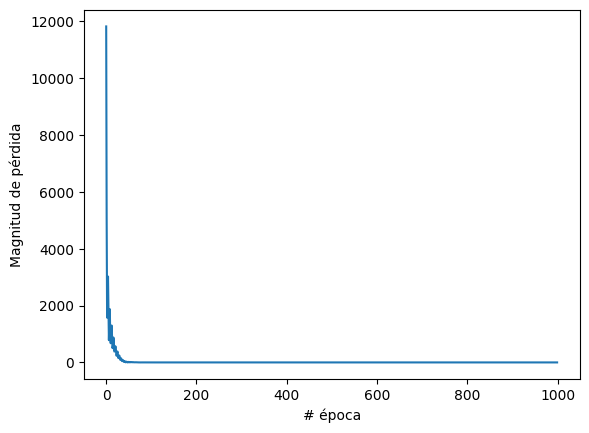

In [73]:
import matplotlib.pyplot as plt  # Importa la biblioteca matplotlib para visualización de datos.

plt.xlabel("# época")  # Etiqueta del eje x del gráfico.
plt.ylabel("Magnitud de pérdida")  # Etiqueta del eje y del gráfico.

# Utiliza la función plot() para trazar el gráfico de la magnitud de pérdida a lo largo de las épocas.
# Utiliza el historial del entrenamiento para obtener la magnitud de pérdida en cada época.
plt.plot(historial.history["loss"])  # Plotea la magnitud de pérdida en función del número de época.


In [74]:
print("Hagamos una predicción!")  # Imprime un mensaje indicando que se realizará una predicción.

# Utiliza el modelo entrenado para hacer una predicción sobre la temperatura en Fahrenheit para 25.5 grados Celsius.
resultado = modelo.predict([25.5])

# Imprime el resultado de la predicción.
# Nota: El resultado es una matriz NumPy, por lo que necesitamos convertirlo a una cadena para imprimirlo.
print("El resultado es " + str(resultado) + " Fahrenheit!")  # Imprime el resultado de la predicción.


Hagamos una predicción!
1/1 [==============================] - 0s 93ms/step
El resultado es [[77.873474]] Fahrenheit!


In [75]:
print("Variables internas del modelo")  # Imprime un mensaje indicando que se mostrarán las variables internas del modelo.

# Imprime los pesos y sesgos de las capas ocultas y de salida del modelo.
# Nota: Para acceder a los pesos y sesgos de una capa, se utiliza el método get_weights().
# Esto devolverá una lista de dos elementos: el primer elemento son los pesos y el segundo elemento son los sesgos.
# Imprime los pesos y sesgos de la primera capa oculta.
print(oculta1.get_weights())
# Imprime los pesos y sesgos de la segunda capa oculta.
print(oculta2.get_weights())
# Imprime los pesos y sesgos de la tercera capa oculta.
print(oculta3.get_weights())
# Imprime los pesos y sesgos de la capa de salida.
print(salida.get_weights())


Variables internas del modelo
[array([[-1.0552708 ,  0.42157492,  0.04625059]], dtype=float32), array([-3.773786 ,  3.8012671,  2.5426867], dtype=float32)]
[array([[-0.59810257,  0.21758573, -0.77437395],
       [ 0.26700646,  0.12703383,  0.7701716 ],
       [-0.21331297, -0.26579693,  0.4646265 ]], dtype=float32), array([ 3.8760262, -2.612133 ,  3.8914416], dtype=float32)]
[array([[-0.31899607,  0.5808859 ,  0.5275857 ],
       [ 0.37112278, -0.06231502,  0.5013104 ],
       [-0.38900205,  0.90083086, -0.3623884 ]], dtype=float32), array([-3.598851 ,  4.0084496, -2.1728795], dtype=float32)]
[array([[-0.03276018],
       [ 0.6643881 ],
       [-0.6118194 ]], dtype=float32), array([3.6847987], dtype=float32)]
